In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import sklearn 




In [7]:
#https://strathprints.strath.ac.uk/67084/1/Koukoura_etal_2018_An_insight_into_wind_turbine_planet_bearing.pdf

In [8]:
df=pd.read_excel("rK3g26ERseWlQI7rj1yw_Table_1.xlsx")

In [9]:
max_value = df['Pow'].max()
print("max_value Pow: "+str(max_value))
min_value = df['Pow'].min()
print("min_value Pow: "+str(min_value))

max_value Pow: 2302.7080078125
min_value Pow: -42.6514282226563


In [10]:
#calculate normalized power, which statistic?

In [11]:
df.insert(6, "NPow", (df.Pow-min_value)/(max_value-min_value), True)
#Normal?
print("Mean:")
print(df.mean())
print("Std:")
print(df.std())


Mean:
date_num    734884.496528
Ws               6.814093
Pow            699.289243
Temp             3.377414
Pressure       981.915683
NPow             0.316344
dtype: float64
Std:
date_num      8.949931
Ws            3.573914
Pow         744.811356
Temp          2.419593
Pressure     12.942475
NPow          0.317568
dtype: float64


In [12]:
#df.insert(6, "NPow", (df.Pow-df.mean())/(df.std()), True)


In [13]:
print(df.head())
print(df.isnull().sum().sort_values(ascending=False).head())
df.insert(7, "NPow(%)", 100*df.NPow, True)

              Time_stamp       date_num         Ws          Pow     Temp  \
0  '2012-01-01 00:00:00'  734869.000000   8.974833  1310.025024  6.57349   
1  '2012-01-01 00:10:00'  734869.006944   9.908769  1684.520996  6.62630   
2  '2012-01-01 00:20:00'  734869.013889   9.639434  1532.052002  6.81988   
3  '2012-01-01 00:30:00'  734869.020833  11.836330  1997.869995  6.93197   
4  '2012-01-01 00:40:00'  734869.027778  11.687170  2135.758057  6.98667   

     Pressure      NPow  
0  962.732971  0.576746  
1  962.578003  0.736421  
2  962.244019  0.671412  
3  961.859985  0.870025  
4  961.864014  0.928817  
Pressure    58
Temp        58
NPow         4
Pow          4
Ws           4
dtype: int64


In [14]:
print(df.head(5))

              Time_stamp       date_num         Ws          Pow     Temp  \
0  '2012-01-01 00:00:00'  734869.000000   8.974833  1310.025024  6.57349   
1  '2012-01-01 00:10:00'  734869.006944   9.908769  1684.520996  6.62630   
2  '2012-01-01 00:20:00'  734869.013889   9.639434  1532.052002  6.81988   
3  '2012-01-01 00:30:00'  734869.020833  11.836330  1997.869995  6.93197   
4  '2012-01-01 00:40:00'  734869.027778  11.687170  2135.758057  6.98667   

     Pressure      NPow    NPow(%)  
0  962.732971  0.576746  57.674591  
1  962.578003  0.736421  73.642121  
2  962.244019  0.671412  67.141241  
3  961.859985  0.870025  87.002503  
4  961.864014  0.928817  92.881690  


In [15]:
max_value = df['NPow(%)'].max()
print("max_value NPow(%): "+str(max_value))
min_value = df['NPow(%)'].min()
print("min_value NPow(%): "+str(min_value))

max_value NPow(%): 100.0
min_value NPow(%): 0.0


In [16]:
#Data points where maximum wind speed has reached more than 25 m/s are also filtered out
max_value = df['Ws'].max()
print("max_value Ws: "+str(max_value))
min_value = df['Ws'].min()
print("min_value Ws: "+str(min_value))

max_value Ws: 23.1718807220459
min_value Ws: 0.0


In [17]:
#https://medium.com/critical-powers/formulas-from-training-and-racing-with-a-power-meter-2a295c661b46#:~:text=Normalized%20Power,-Normalized%20Power%20(NP&text=Step%201%3A%20Calculate%20the%20rolling,values%20from%20the%20previous%20step.

In [18]:
#print(df.head(10))
print("Number of rows in df: "+str(len(df.index)))

Number of rows in df: 4464


In [19]:
#before pre-processing Red

In [20]:
#data pre-processing

In [21]:
print(df.columns)
print(df.describe())

Index(['Time_stamp', 'date_num', 'Ws', 'Pow', 'Temp', 'Pressure', 'NPow',
       'NPow(%)'],
      dtype='object')
            date_num           Ws          Pow         Temp     Pressure  \
count    4464.000000  4460.000000  4460.000000  4406.000000  4406.000000   
mean   734884.496528     6.814093   699.289243     3.377414   981.915683   
std         8.949931     3.573914   744.811356     2.419593    12.942475   
min    734869.000000     0.000000   -42.651428    -2.180700   934.159973   
25%    734876.748264     4.166160    80.860479     1.510470   973.849762   
50%    734884.496528     6.225677   335.774612     3.189075   984.079498   
75%    734892.244792     9.325553  1285.598236     5.094607   992.327026   
max    734899.993056    23.171881  2302.708008     9.993120  1001.919983   

              NPow      NPow(%)  
count  4460.000000  4460.000000  
mean      0.316344    31.634412  
std       0.317568    31.756811  
min       0.000000     0.000000  
25%       0.052662     5.26622

In [22]:
print(df.isnull().sum().sort_values(ascending=False).head())

Pressure    58
Temp        58
NPow(%)      4
NPow         4
Pow          4
dtype: int64


In [23]:
#Firstly, samples with missing values or no power production are filtered out
#df1=df.dropna()

#or another strategy, fill NaN values with the mean
df1=df[['date_num', 'Ws', 'Pow', 'Temp', 'Pressure','NPow(%)']]



In [24]:
#df1.fillna(df.mean(), inplace = True) 
df1.dropna()

,date_num,Ws,Pow,Temp,Pressure,NPow(%)
0,734869.000000,8.974833,1310.025024,6.57349,962.732971,57.674591
1,734869.006944,9.908769,1684.520996,6.62630,962.578003,73.642121
2,734869.013889,9.639434,1532.052002,6.81988,962.244019,67.141241
3,734869.020833,11.836330,1997.869995,6.93197,961.859985,87.002503
4,734869.027778,11.687170,2135.758057,6.98667,961.864014,92.881690
...,...,...,...,...,...,...
4459,734899.965278,5.758693,357.255615,-1.31252,1001.549988,17.050992
4460,734899.972222,4.885149,201.526596,-1.06633,1001.659973,10.411113
4461,734899.979167,4.899565,208.354401,-1.06325,1001.669983,10.702233
4462,734899.986111,4.493377,169.388901,-1.16304,1001.809998,9.040846


In [25]:
print(df1.isnull().sum().sort_values(ascending=False).head())

Pressure    58
Temp        58
NPow(%)      4
Pow          4
Ws           4
dtype: int64


In [26]:
#print("Number of rows in df1: "+str(len(df1.index)))
print("Number of rows in df1: "+str(len(df1.index)))

Number of rows in df1: 4464


In [27]:
#a lower limit of output power is set at 0 kW for data sample selection.
df2= df1[df1['Pow'] >= 10]  
print("Number of rows in df2: "+str(len(df2.index)))
min_value = df2['Pow'].min()
print("min_value Pow in df2: "+str(min_value))

Number of rows in df2: 3952
min_value Pow in df2: 10.1383304595947


In [28]:
df2.describe()

,date_num,Ws,Pow,Temp,Pressure,NPow(%)
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000,3952.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409,35.515131
std,9.005456,3.085873,743.848479,2.440402,11.968703,31.715756
min,734869.000000,1.821097,10.138330,-2.180700,936.090027,2.250817
25%,734876.616319,4.576938,117.458776,1.627327,974.352264,6.826681
50%,734884.989583,6.521796,488.904800,3.362340,983.518005,22.664169
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242,62.385871
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983,100.000000


In [29]:
#Data pointswhere maximum wind speed has reached more than 25 m/s are also filtered out
df3=df2[(df2['Ws']<25)]
df3.describe()

,date_num,Ws,Pow,Temp,Pressure,NPow(%)
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000,3952.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409,35.515131
std,9.005456,3.085873,743.848479,2.440402,11.968703,31.715756
min,734869.000000,1.821097,10.138330,-2.180700,936.090027,2.250817
25%,734876.616319,4.576938,117.458776,1.627327,974.352264,6.826681
50%,734884.989583,6.521796,488.904800,3.362340,983.518005,22.664169
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242,62.385871
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983,100.000000


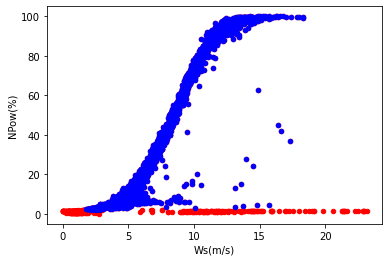

In [30]:
ax=df.plot(kind='scatter',x='Ws',y='NPow(%)',color='red')
df3.plot(ax=ax, kind='scatter',x='Ws',y='NPow(%)',color='blue')
ax.set_xlabel("Ws(m/s)")
ax.set_ylabel("NPow(%)")
#ax.left_ax.set_ylabel('Variance of log wages')
#plt.legend(loc='best')

plt.show()

In [31]:

# model normal behaviour so curtailment should not be considered


#cluster filter is applied on the training data and aims to remove outliers depending on the operating conditions 
#of the wind turbine.
#A multivariate outlier detection approach based on Mahalanobis distance is used in 
#This paper utilizes agglomerative hierarchical clustering (Rokach & Maimon, 2005)

#used in the linkage function which determines how the objects in the data set should be grouped into clusters that form a binary hierarchical cluster tree.

#A probability threshold of 2.5% is chosen

In [32]:
#Mahalanobis distance

print(df3.columns)
df4=df3[['date_num', 'Ws', 'Pow', 'Temp', 'Pressure']]
print(df4.columns)

#The distance is calculated in the Euclidean space and the inner squared distance is computed using Ward’s algorithm
#The distance is calculated for each data vector in the training data set from its cluster centre


Index(['date_num', 'Ws', 'Pow', 'Temp', 'Pressure', 'NPow(%)'], dtype='object')
Index(['date_num', 'Ws', 'Pow', 'Temp', 'Pressure'], dtype='object')


In [33]:
df4.describe()


,date_num,Ws,Pow,Temp,Pressure
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409
std,9.005456,3.085873,743.848479,2.440402,11.968703
min,734869.000000,1.821097,10.138330,-2.180700,936.090027
25%,734876.616319,4.576938,117.458776,1.627327,974.352264
50%,734884.989583,6.521796,488.904800,3.362340,983.518005
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983


In [34]:
df4.shape[0]

3952

In [35]:
#error with df4 for dendrogram
df5=df4.head(700)
#https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318


In [36]:
# Ws, T or Pow, T?
X = df5.iloc[:, [1,3]].values




In [37]:
import scipy.cluster.hierarchy as sch

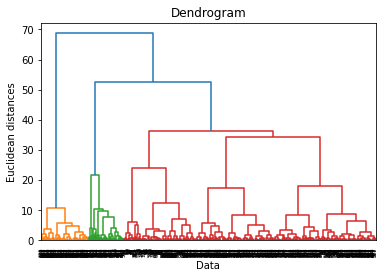

In [38]:

try:
    dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
    plt.title('Dendrogram')
    plt.xlabel('Data')
    plt.ylabel('Euclidean distances')
    plt.show()
except:
  print("An exception occurred")
    

In [39]:
# How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can vertically without crossing any horizontal line


In [40]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [41]:
y_hc=hc.fit_predict(X)

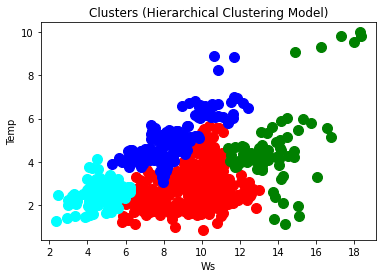

In [42]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.title('Clusters (Hierarchical Clustering Model)')
plt.xlabel('Ws')
plt.ylabel('Temp')
plt.show()

In [43]:
#Cluster 1 red: Ws [5.8-12.5], Temp[1-5.5]
#Cluster 2 blue: Ws [5-12.5], Temp[3-9]
#Cluster 4 cyan : Ws [2.2-6.5], Temp[1-4.5]
#Cluster 3 green: Ws [11-18.3], Temp[1-10]

In [44]:
coordinatesCenter=[]

def findCordinateCenter(xList,yList,coordinates):
    xCenter= np.sum(xList)/len(xList)
    yCenter= np.sum(yList)/len(yList)
    coordinates.append(xCenter)
    coordinates.append(yCenter)
    return coordinates


    

In [45]:
#Cluster 1 red: Ws [5.8-12.5], Temp[1-5.5]
df6=df5[(df5['Ws']>=5.8)&(df5['Ws']<=12.5)&(df5['Temp']>=1)&(df5['Temp']<=5.5)]
print(df6.head())



         date_num        Ws          Pow     Temp    Pressure
7   734869.048611  9.876040  1633.453003  5.08222  962.325989
8   734869.055556  9.009182  1315.854980  4.86094  962.309998
9   734869.062500  8.327333  1141.844971  4.83201  962.119995
10  734869.069444  8.674167  1190.046997  4.78734  962.099976
11  734869.076389  8.021000   993.341675  4.73432  962.245972


In [46]:
C1=findCordinateCenter(df6['Ws'],df6['Temp'],coordinatesCenter)
print(C1)

[9.188052343989085, 3.223777292255394]


In [47]:
df6['distance'] = df6[['Ws', 'Temp']].sub(np.array(C1)).pow(2).sum(1).pow(0.5)

<ipython-input-47-26bb9f52520d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['distance'] = df6[['Ws', 'Temp']].sub(np.array(C1)).pow(2).sum(1).pow(0.5)


In [48]:
#Cluster 2 blue: Ws [5-12.5], Temp[3-9]
df7=df5[(df5['Ws']>=5)&(df5['Ws']<=12.5)&(df5['Temp']>=3)&(df5['Temp']<=9)]
print(df7.head())


        date_num         Ws          Pow     Temp    Pressure
0  734869.000000   8.974833  1310.025024  6.57349  962.732971
1  734869.006944   9.908769  1684.520996  6.62630  962.578003
2  734869.013889   9.639434  1532.052002  6.81988  962.244019
3  734869.020833  11.836330  1997.869995  6.93197  961.859985
4  734869.027778  11.687170  2135.758057  6.98667  961.864014


In [49]:
df7.describe()

,date_num,Ws,Pow,Temp,Pressure
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,734871.340429,9.357610,1413.986315,4.388060,965.338903
std,1.850661,1.593629,492.725443,1.072778,9.124988
min,734869.000000,5.179299,185.909897,3.000670,939.130005
25%,734869.562500,8.309500,1056.671997,3.477210,959.390991
50%,734870.958333,9.481803,1482.244995,4.247790,961.810974
75%,734873.347222,10.570670,1828.267944,5.042020,971.749023
max,734874.611111,12.477540,2254.333008,8.893600,988.979980


In [50]:
coordinatesCenter=[]
C2=findCordinateCenter(df7['Ws'],df7['Temp'],coordinatesCenter)
print(C2)

[9.357610029594921, 4.388059854507446]


In [51]:
df7['distance'] = df7[['Ws', 'Temp']].sub(np.array(C2)).pow(2).sum(1).pow(0.5)

<ipython-input-51-9d21c0196a30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['distance'] = df7[['Ws', 'Temp']].sub(np.array(C2)).pow(2).sum(1).pow(0.5)


In [52]:
#Cluster 4 cyan : Ws [2.2-6.5], Temp[1-4.5]
df8=df5[(df5['Ws']>=2.2)&(df5['Ws']<=6.5)&(df5['Temp']>=1)&(df5['Temp']<=4.5)]
print(df8.head())

          date_num        Ws         Pow     Temp    Pressure
389  734871.701389  6.193667  483.173309  2.85663  956.648987
402  734871.791667  6.480366  414.567413  1.11090  959.716003
411  734871.854167  6.140500  321.293304  1.29683  962.341980
412  734871.861111  6.082333  212.346695  1.40071  962.721985
414  734871.875000  4.953500  211.380005  1.65658  963.202026


In [53]:
coordinatesCenter=[]
C3=findCordinateCenter(df8['Ws'],df8['Temp'],coordinatesCenter)
print(C3)

[4.984124333627762, 2.5287833079215023]


In [54]:
df8['distance'] = df8[['Ws', 'Temp']].sub(np.array(C3)).pow(2).sum(1).pow(0.5)

<ipython-input-54-a090d24e9cf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['distance'] = df8[['Ws', 'Temp']].sub(np.array(C3)).pow(2).sum(1).pow(0.5)


In [55]:
#Cluster 3 green: Ws [11-18.3], Temp[1-10]
df9=df5[(df5['Ws']>=11)&(df5['Ws']<=18.3)&(df5['Temp']>=1)&(df5['Temp']<=10)]
print(df9.head())

         date_num        Ws          Pow     Temp    Pressure
3   734869.020833  11.83633  1997.869995  6.93197  961.859985
4   734869.027778  11.68717  2135.758057  6.98667  961.864014
5   734869.034722  12.14433  2149.540039  6.74057  961.499023
6   734869.041667  13.42517  2056.350098  5.35465  962.164978
16  734869.111111  11.55907  1914.110962  6.74833  961.635010


In [56]:
coordinatesCenter=[]
C4=findCordinateCenter(df9['Ws'],df9['Temp'],coordinatesCenter)
print(C4)

[12.681771250738617, 3.992453346217889]


In [57]:
df9['distance'] = df9[['Ws', 'Temp']].sub(np.array(C4)).pow(2).sum(1).pow(0.5)

<ipython-input-57-4f7e3537234f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['distance'] = df9[['Ws', 'Temp']].sub(np.array(C4)).pow(2).sum(1).pow(0.5)


In [58]:
df_row = pd.concat([df6, df7,df8,df9])

In [59]:
df_row.describe()

,date_num,Ws,Pow,Temp,Pressure,distance
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000
mean,734871.660645,9.202143,1329.896300,3.586907,966.301064,1.708664
std,1.702169,2.440987,651.891091,1.327200,10.726246,0.900049
min,734869.000000,2.359766,20.244591,1.110900,936.090027,0.084612
25%,734870.081597,7.715399,841.778015,2.524590,959.427765,1.100525
50%,734871.586806,9.404341,1425.161011,3.389690,962.698975,1.625313
75%,734873.390625,10.868917,1907.983032,4.459400,973.227264,2.194796
max,734874.611111,18.292830,2302.708008,9.993120,989.280029,8.215350


In [60]:
num_tot=df_row['date_num'].sum()
print(num_tot)

796600880.1388891


In [61]:
df_row['Pd1(%)'] =(df_row['distance']*df_row['date_num']*100)/num_tot

In [62]:
df_row.describe()

,date_num,Ws,Pow,Temp,Pressure,distance,Pd1(%)
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000
mean,734871.660645,9.202143,1329.896300,3.586907,966.301064,1.708664,0.157626
std,1.702169,2.440987,651.891091,1.327200,10.726246,0.900049,0.083030
min,734869.000000,2.359766,20.244591,1.110900,936.090027,0.084612,0.007806
25%,734870.081597,7.715399,841.778015,2.524590,959.427765,1.100525,0.101524
50%,734871.586806,9.404341,1425.161011,3.389690,962.698975,1.625313,0.149936
75%,734873.390625,10.868917,1907.983032,4.459400,973.227264,2.194796,0.202472
max,734874.611111,18.292830,2302.708008,9.993120,989.280029,8.215350,0.757873


In [63]:
#Eliminate those data vectors, whose probability of occurrence is lower than a threshold value
df10=df_row[df_row['Pd1(%)']>=0.025]

In [64]:
df_row.shape[0]

1084

In [65]:
df10.shape[0]

1069

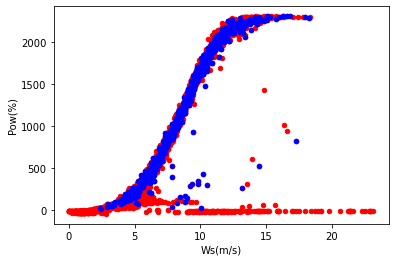

In [66]:
ax=df.plot(kind='scatter',x='Ws',y='Pow',color='red')
df10.plot(ax=ax, kind='scatter',x='Ws',y='Pow',color='blue')
ax.set_xlabel("Ws(m/s)")
ax.set_ylabel("Pow(%)")
#ax.left_ax.set_ylabel('Variance of log wages')
#plt.legend(loc='best')

plt.show()

In [67]:
#https://blog.csdn.net/V_lq6h/article/details/88647945

In [68]:
#Wrong method: use the distance matrix obtained by the squareform function

#from scipy.cluster.hierarchy import linkage

#row_clusters=linkage(row_dist,method='complete',metric='euclidean')
#The correct method: use the dense distance matrix

#row_clusters=linkage(pdist(df,metric='euclidean'),method='complete')
#The correct method: use the matrix format to enter

#row_clusters=linkage(df.values,method='complete',metric='euclidean')

In [69]:
#import scipy.cluster.hierarchy as sch
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
   

In [70]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
X = df4.iloc[:, [1,3]].values



#row_clusters=linkage(pdist(X,metric='euclidean'),method='complete')

In [71]:
#clusters
#pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no. of items in clust.'],index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])])

In [72]:
#from scipy.cluster.hierarchy import dendrogram

#row_dendr=dendrogram(row_clusters,labels=labels)

#plt.tight_layout()
#plt.ylabel('Euclidean distance')

#plt.show()

In [73]:
import numpy as np
from scipy.cluster import hierarchy 
from scipy.spatial import distance

X = df4.iloc[:, [2,3]].values

y = distance.pdist(X, metric="euclidean")
y[np.isnan(y)] = 1

out = hierarchy.linkage(y,method='ward')

children = out[:, :2].astype(np.int)
row_clusters=linkage(pdist(children,metric='euclidean'),method='ward')
print(children.shape)

(3951, 2)


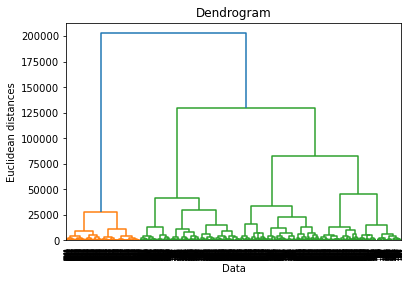

In [77]:
import scipy.cluster.hierarchy as sch
try:
    dendrogram = sch.dendrogram(sch.linkage(children, method  = "ward"))
    plt.title('Dendrogram')
    plt.xlabel('Data')
    plt.ylabel('Euclidean distances')
    plt.show()
except:
  print("An exception occurred")
    

In [75]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters =4, affinity = 'euclidean', linkage ='ward')

In [76]:
y_hc=hc.fit_predict(children)

In [ ]:
X=children
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('ws')
plt.ylabel('pow')
plt.show()

In [1596]:
coordinatesCenter=[]

def findCordinateCenter(xList,yList,coordinates):
    xCenter= np.sum(xList)/len(xList)
    yCenter= np.sum(yList)/len(yList)
    coordinates.append(xCenter)
    coordinates.append(yCenter)
    return coordinates

In [ ]:
#Cluster 1 red: Ws [5.8-12.5], Temp[1-5.5]
df6=df4[(df4['Pow']>=2800)&(df4['Pow']<=6000)&(df4['Temp']>=2800)&(df4['Temp']<=7200)]
print(df6.head())
C1=findCordinateCenter(df6['Ws'],df6['Temp'],coordinatesCenter)
print(C1)
df6['distance'] = df6[['Ws', 'Temp']].sub(np.array(C1)).pow(2).sum(1).pow(0.5)

In [1558]:
df6.head()

,date_num,Ws,Pow,Temp,Pressure,distance


In [1559]:
#Cluster green: Ws [5.8-12.5], Temp[1-5.5]
coordinatesCenter=[]
df7=df4[(df4['Pow']>=0)&(df4['Pow']<=3000)&(df4['Temp']>=0)&(df4['Temp']<=45000)]
print(df7.head())
C2=findCordinateCenter(df7['Ws'],df7['Temp'],coordinatesCenter)
print(C2)
df7['distance'] = df7[['Ws', 'Temp']].sub(np.array(C2)).pow(2).sum(1).pow(0.5)

        date_num         Ws          Pow     Temp    Pressure
0  734869.000000   8.974833  1310.025024  6.57349  962.732971
1  734869.006944   9.908769  1684.520996  6.62630  962.578003
2  734869.013889   9.639434  1532.052002  6.81988  962.244019
3  734869.020833  11.836330  1997.869995  6.93197  961.859985
4  734869.027778  11.687170  2135.758057  6.98667  961.864014
[7.272698374572932, 3.7762094650080775]


<ipython-input-1559-1820f925f57f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['distance'] = df7[['Ws', 'Temp']].sub(np.array(C2)).pow(2).sum(1).pow(0.5)


In [1560]:
coordinatesCenter=[]
#Cluster 1 cyan: Ws [5.8-12.5], Temp[1-5.5]
df8=df4[(df4['Pow']>=4500)&(df4['Pow']<=8000)&(df4['Temp']>=5700)&(df4['Temp']<=8000)]
print(df8.head())
C3=findCordinateCenter(df8['Ws'],df8['Temp'],coordinatesCenter)
print(C3)
df8['distance'] = df8[['Ws', 'Temp']].sub(np.array(C3)).pow(2).sum(1).pow(0.5)

Empty DataFrame
Columns: [date_num, Ws, Pow, Temp, Pressure]
Index: []
[nan, nan]


<ipython-input-1556-3dc6b94436c4>:4: RuntimeWarning: invalid value encountered in double_scalars
  xCenter= np.sum(xList)/len(xList)
<ipython-input-1556-3dc6b94436c4>:5: RuntimeWarning: invalid value encountered in double_scalars
  yCenter= np.sum(yList)/len(yList)


In [1561]:
coordinatesCenter=[]
#Cluster 1 blue: Ws [5.8-12.5], Temp[1-5.5]
df9=df4[(df4['Pow']>=0)&(df4['Pow']<=3500)&(df4['Temp']>=4000)&(df4['Temp']<=7000)]
print(df9.head())
C4=findCordinateCenter(df6['Ws'],df6['Temp'],coordinatesCenter)
print(C4)
df9['distance'] = df9[['Ws', 'Temp']].sub(np.array(C4)).pow(2).sum(1).pow(0.5)

Empty DataFrame
Columns: [date_num, Ws, Pow, Temp, Pressure]
Index: []
[nan, nan]


<ipython-input-1556-3dc6b94436c4>:4: RuntimeWarning: invalid value encountered in double_scalars
  xCenter= np.sum(xList)/len(xList)
<ipython-input-1556-3dc6b94436c4>:5: RuntimeWarning: invalid value encountered in double_scalars
  yCenter= np.sum(yList)/len(yList)


In [1599]:
df_row = pd.concat([df6, df7,df8,df9])


In [1600]:
num_tot=df_row['date_num'].sum()
print(num_tot)

2678651847.4375005


In [1601]:
df_row['Pd1(%)'] =(df_row['distance']*df_row['date_num']*100)/num_tot


In [1602]:
df_row.describe()

,date_num,Ws,Pow,Temp,Pressure,distance,Pd1(%)
count,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,734883.908762,7.272698,836.578275,3.776209,981.237354,3.462372,0.094990
std,8.933130,3.095980,749.075581,2.270072,11.978783,1.657410,0.045471
min,734869.000000,1.821097,10.138330,0.000646,936.090027,0.040352,0.001107
25%,734876.097222,4.737313,129.126404,1.916840,973.822998,2.267006,0.062194
50%,734884.687500,6.901833,599.739990,3.722590,982.544006,3.399079,0.093251
75%,734891.597222,9.476461,1494.094971,5.418560,990.765991,4.413479,0.121085
max,734899.868056,18.339830,2302.708008,9.993120,1001.140015,12.652797,0.347122


In [1603]:
df_row.shape[0]

3645

In [1604]:
#Eliminate those data vectors, whose probability of occurrence is lower than a threshold value
df10=df_row[df_row['Pd1(%)']>=0.025]

In [1605]:
df10.shape[0]

3488

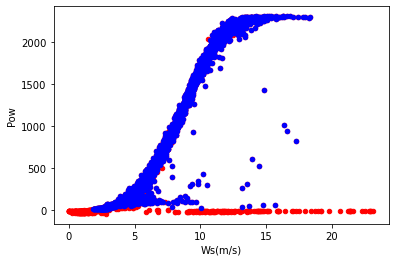

In [1606]:
ax=df.plot(kind='scatter',x='Ws',y='Pow',color='red')
df10.plot(ax=ax, kind='scatter',x='Ws',y='Pow',color='blue')
ax.set_xlabel("Ws(m/s)")
ax.set_ylabel("Pow")
#ax.left_ax.set_ylabel('Variance of log wages')
#plt.legend(loc='best')

plt.show()